##Tirmzi Analysis
n=1000 m+=1000 nm-=120 istep= 4 min=150 max=700

In [1]:
import sys
sys.path
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy import signal

In [2]:
ls

 Volume in drive C is Local Disk
 Volume Serial Number is AA1B-997A

 Directory of C:\Users\emaro\OneDrive - University of Mount Union\XSEDE Summer 2021\xsede-spm\data

08/03/2021  01:16 PM    <DIR>          .
08/03/2021  01:16 PM    <DIR>          ..
08/03/2021  01:16 PM    <DIR>          .ipynb_checkpoints
08/02/2021  02:01 PM    <DIR>          0309-VariedNuni_8_2_2021-0000
08/02/2021  02:15 PM    <DIR>          8_2_2021
08/02/2021  02:18 PM           152,527 8_2_2021_FortranVariedNuni.ipynb
08/02/2021  03:39 PM           161,361 8_2_2021_FortranVariedNuni-Copy1.ipynb
08/03/2021  01:16 PM           130,726 8_2_2021_PythonVariedNuni.ipynb
08/02/2021  02:58 PM           130,726 8_2_2021_PythonVariedNuni-Copy1.ipynb
08/02/2021  02:52 PM    <DIR>          8_2_2021P
08/02/2021  03:38 PM            16,563 Alpha v. Z for varying sample thickness, 06-28-2021.png
08/02/2021  03:38 PM            30,669 C' v. Z for 1nm thick sample 06-28-2021.png
08/02/2021  02:15 PM             6,179 C' v. Z f

In [3]:
import capsol.newanalyzecapsol as ac

In [4]:
ac.get_gridparameters

<function capsol.newanalyzecapsol.get_gridparameters(f_name)>

In [5]:
import glob

In [6]:
folders = glob.glob("erequals1_P/*/")
folders


['erequals1_P\\0316-er_equal_1-0002\\',
 'erequals1_P\\0318-er_equal_1-0001\\',
 'erequals1_P\\0320-er_equal_1-0000\\']

In [7]:
all_data= dict() 
for folder in folders:
    params = ac.get_gridparameters(folder + 'capsol.in')
    data = ac.np.loadtxt(folder + 'C-Z.dat')
    process_data = ac.process_data(params, data, smoothing=False, std=5*10**-9, fortran=False)
    all_data[folder]= (process_data)
all_params= dict()
for folder in folders:
    params=ac.get_gridparameters(folder + 'capsol.in')
    all_params[folder]= (params)

In [8]:
all_data

{'erequals1_P\\0316-er_equal_1-0002\\': {'z': array([150., 152., 154., 156., 158., 160., 162., 164., 166., 168., 170.,
         172., 174., 176., 178., 180., 182., 184., 186., 188., 190., 192.,
         194., 196., 198., 200., 202., 204., 206., 208., 210., 212., 214.,
         216., 218., 220., 222., 224., 226., 228., 230., 232., 234., 236.,
         238., 240., 242., 244., 246., 248.]),
  'c': array([3.23412104e-15, 3.23375499e-15, 3.23339017e-15, 3.23302656e-15,
         3.23266414e-15, 3.23230290e-15, 3.23194281e-15, 3.23158386e-15,
         3.23122602e-15, 3.23086929e-15, 3.23051365e-15, 3.23015908e-15,
         3.22980556e-15, 3.22945308e-15, 3.22910163e-15, 3.22875118e-15,
         3.22840174e-15, 3.22805328e-15, 3.22770579e-15, 3.22735926e-15,
         3.22701368e-15, 3.22666903e-15, 3.22632531e-15, 3.22598249e-15,
         3.22564057e-15, 3.22529955e-15, 3.22495940e-15, 3.22462011e-15,
         3.22428169e-15, 3.22394411e-15, 3.22360737e-15, 3.22327146e-15,
         3.22293637e

In [9]:
all_data.keys()

dict_keys(['erequals1_P\\0316-er_equal_1-0002\\', 'erequals1_P\\0318-er_equal_1-0001\\', 'erequals1_P\\0320-er_equal_1-0000\\'])

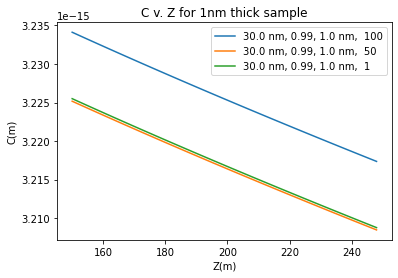

In [10]:
for key in {key: params for key, params in all_params.items() if params['Thickness_sample'] == 1.0}:
    data=all_data[key]
    thickness =all_params[key]['Thickness_sample']
    rtip= all_params[key]['Rtip']
    er=all_params[key]['eps_r']
    Nuni=all_params[key]['Nuni']
    plt.plot(data['z'], data['c'], label= f'{rtip} nm, {er}, {thickness} nm,  {Nuni}')
    
    
plt.title('C v. Z for 1nm thick sample')    
plt.ylabel("C(m)")
plt.xlabel("Z(m)")
plt.legend()
plt.savefig("C' v. Z for 1nm thick sample 06-28-2021.png")

cut off last experiment because capacitance was off the scale

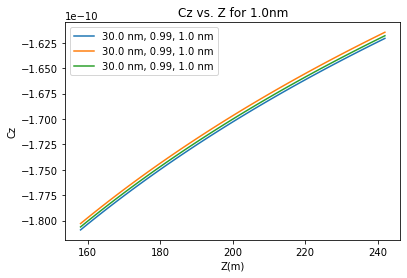

In [11]:
for key in {key: params for key, params in all_params.items() if params['Thickness_sample'] == 1.0}:
    data=all_data[key]
    thickness=all_params[key]['Thickness_sample']
    rtip= all_params[key]['Rtip']
    er=all_params[key]['eps_r']
    s=slice(4,-3)
    plt.plot(data['z'][s], data['cz'][s], label=f'{rtip} nm, {er}, {thickness} nm' )
    
plt.title('Cz vs. Z for 1.0nm')    
plt.ylabel("Cz")
plt.xlabel("Z(m)")
plt.legend()
plt.savefig("Cz v. Z for varying sample thickness, 06-28-2021.png")

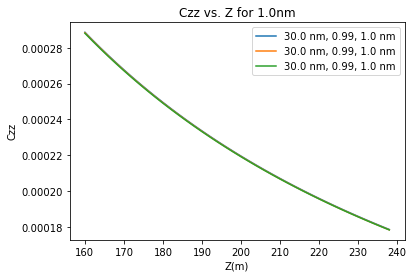

In [12]:
for key in {key: params for key, params in all_params.items() if params['Thickness_sample'] == 1.0}:
    data=all_data[key]
    thickness=all_params[key]['Thickness_sample']
    rtip= all_params[key]['Rtip']
    er=all_params[key]['eps_r']
    s=slice(5,-5)
    plt.plot(data['z'][s], data['czz'][s], label=f'{rtip} nm, {er}, {thickness} nm' )
    
plt.title('Czz vs. Z for 1.0nm')    
plt.ylabel("Czz")
plt.xlabel("Z(m)")
plt.legend()
plt.savefig("Czz v. Z for varying sample thickness, 06-28-2021.png")

In [13]:
params

{'n': 1000,
 'm+': 1000,
 'm-': 2,
 'h0': 0.5,
 'rho_max': 1000000.0,
 'z_max': 1000000.0,
 'min': 150.0,
 'max': 250.0,
 'istep': 4.0,
 'Rtip': 30.0,
 'half-angle': 20.0,
 'HCone': 15000.0,
 'RCantilever': 13750.0,
 'thickness_Cantilever': 999.99,
 'eps_r': 0.99,
 'Thickness_sample': 1.0,
 'Solving Method': 'LAPACK',
 'Test': 0,
 'Verbosity': 1,
 'Nuni': 1,
 'Equally spaced': False}

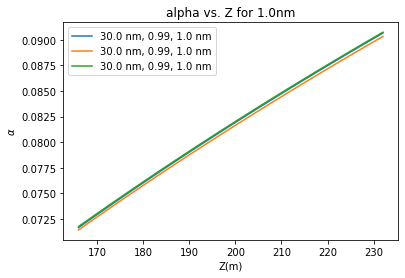

In [14]:
for key in {key: params for key, params in all_params.items() if params['Thickness_sample'] == 1.0}:
    data=all_data[key]
    thickness=all_params[key]['Thickness_sample']
    rtip= all_params[key]['Rtip']
    er=all_params[key]['eps_r']
    s=slice(8,-8)
    plt.plot(data['z'][s], data['alpha'][s], label=f'{rtip} nm, {er}, {thickness} nm' )
    
plt.title('alpha vs. Z for 1.0nm')    
plt.ylabel("$\\alpha$")
plt.xlabel("Z(m)")
plt.legend()
plt.savefig("Alpha v. Z for varying sample thickness, 06-28-2021.png")

In [15]:
data

{'z': array([150., 152., 154., 156., 158., 160., 162., 164., 166., 168., 170.,
        172., 174., 176., 178., 180., 182., 184., 186., 188., 190., 192.,
        194., 196., 198., 200., 202., 204., 206., 208., 210., 212., 214.,
        216., 218., 220., 222., 224., 226., 228., 230., 232., 234., 236.,
        238., 240., 242., 244., 246., 248.]),
 'c': array([3.22550022e-15, 3.22513477e-15, 3.22477054e-15, 3.22440752e-15,
        3.22404569e-15, 3.22368503e-15, 3.22332552e-15, 3.22296714e-15,
        3.22260989e-15, 3.22225373e-15, 3.22189866e-15, 3.22154465e-15,
        3.22119170e-15, 3.22083979e-15, 3.22048890e-15, 3.22013902e-15,
        3.21979014e-15, 3.21944224e-15, 3.21909531e-15, 3.21874934e-15,
        3.21840431e-15, 3.21806021e-15, 3.21771704e-15, 3.21737477e-15,
        3.21703340e-15, 3.21669292e-15, 3.21635331e-15, 3.21601458e-15,
        3.21567669e-15, 3.21533966e-15, 3.21500346e-15, 3.21466808e-15,
        3.21433353e-15, 3.21399978e-15, 3.21366683e-15, 3.21333467e-15,


In [16]:
from scipy.optimize import curve_fit


In [17]:
def Cz_model(z, a, n, b,):
    return(a*z**n + b)

In [18]:
all_data.keys()

dict_keys(['erequals1_P\\0316-er_equal_1-0002\\', 'erequals1_P\\0318-er_equal_1-0001\\', 'erequals1_P\\0320-er_equal_1-0000\\'])

In [19]:
data= all_data['capsol-calc\\0001-capsol\\']
z= data['z'][1:-1]
cz= data['cz'][1:-1]

KeyError: 'capsol-calc\\0001-capsol\\'

In [ ]:
popt, pcov= curve_fit(Cz_model, z, cz, p0=[cz[0]*z[0], -1, 0])
a=popt[0]
n=popt[1]
b=popt[2]
std_devs= np.sqrt(pcov.diagonal())
sigma_a = std_devs[0]
sigma_n = std_devs[1]
model_output= Cz_model(z, a, n, b)
rmse= np.sqrt(np.mean((cz - model_output)**2))


In [ ]:
f"a= {a} ± {sigma_a}"

In [ ]:
f"n= {n}± {sigma_n}"

In [ ]:
model_output

In [ ]:
"Root Mean Square Error"

In [ ]:
rmse/np.mean(-cz)